In [2]:
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LogNorm

from astropy.io import fits

from gunagala import imager

from mocks.mocks import create_mock_galaxy_noiseless_image 
from mocks.mocks import data_pixel_scale

%matplotlib inline
rcParams['figure.figsize'] = (12,8)

### Loading simulation data

In [3]:
sim_data='sim_data/cl19.fits'
galaxy_sim_data = fits.open(sim_data)[0].data

### Plotting the raw simulation data

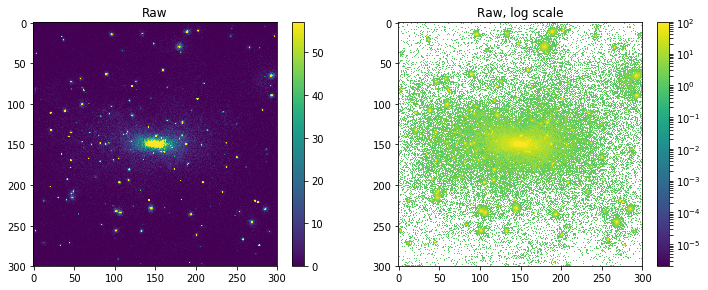

In [4]:
plt.subplot(1,2,1)
plt.imshow(galaxy_sim_data, vmin=0, vmax=57)
plt.colorbar()
plt.title('Raw')
plt.subplot(1,2,2)
plt.imshow(galaxy_sim_data, norm=LogNorm(), vmin=2e-6, vmax=1e2)
plt.colorbar()
plt.title('Raw, log scale')
plt.gcf().set_size_inches(12, 4.5)

In [5]:
print(galaxy_sim_data.max(), galaxy_sim_data.min(), galaxy_sim_data.shape)

862.0 0.0 (300, 300)


### Setup an imager system to get the default parameters.

In [6]:
imagers = imager.create_imagers()
huntsman = imagers['canon_sbig_dark']

Model: MoffatPSF
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_0 y_0 gamma alpha
    --------- --- --- ----- -----
          1.0 0.0 0.0   1.0   4.5


Model: MoffatPSF
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_0 y_0 gamma alpha
    --------- --- --- ----- -----
          1.0 0.0 0.0   1.0   4.5
Model: MoffatPSF
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_0 y_0 gamma alpha
    --------- --- --- ----- -----
          1.0 0.0 0.0   1.0   4.5
Model: MoffatPSF
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_0 y_0 gamma alpha
    --------- --- --- ----- -----
          1.0 0.0 0.0   1.0   4.5


### Setting up pixel scal

In [7]:
sim_arcsec_pixel = data_pixel_scale(10, 170)

3.5227069721693924 arcsec / pix


### Creating noiseless mock image using 

`mocks.mocks.create_mock_galaxy_noiseless_image`

In [8]:
galaxy_coordinates = '14h40m56.435s -60d53m48.3s'

In [9]:
alpha_cen_image = create_mock_galaxy_noiseless_image(galaxy_sim_data,
                                                     huntsman,
                                                     sim_arcsec_pixel,
                                                     galaxy_coordinates)

/Users/amir.ebadati-bazkiaei/gunagala/gunagala/psf.py:417: UserWarning: Warning: below zero values in resampled PSF. Clipping to zero.
  warn("Warning: below zero values in resampled PSF. Clipping to zero.")


In [10]:
print(alpha_cen_image.data.max(), alpha_cen_image.data.min(), alpha_cen_image.shape)

56.087156345528236 1.274705830156097 (3326, 2504)


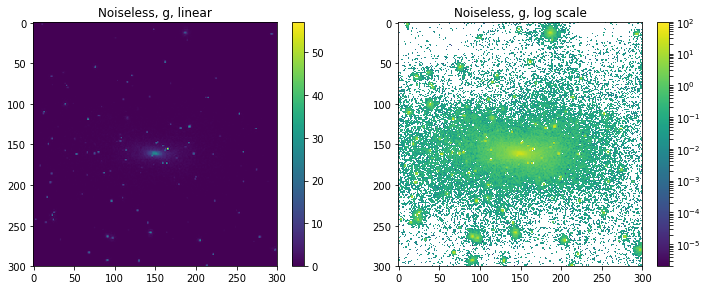

In [11]:
sky_background = np.median(alpha_cen_image[1500:1800,1100:1400])

plt.subplot(1,2,1)
plt.imshow(alpha_cen_image[1500:1800,1100:1400] - sky_background, vmin=0, vmax=57)
plt.colorbar()
plt.title('Noiseless, g, linear')
plt.subplot(1,2,2)
plt.imshow(alpha_cen_image[1500:1800,1100:1400] - sky_background, norm=LogNorm(), vmin=2e-6, vmax=1e2)
plt.colorbar()
plt.title('Noiseless, g, log scale')
plt.gcf().set_size_inches(12, 4.5)

In [12]:
sky_background

1.34860364625048